In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
dataset.shape

(200, 5)

In [111]:
X = dataset.iloc[:, [3, 4]].values
X[1:10,:]

array([[15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

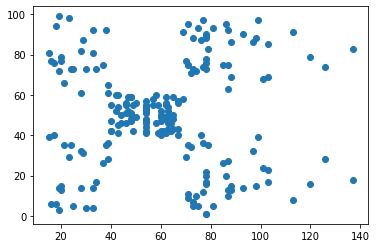

In [126]:
plt.scatter(X[:,0], X[:,1])

## DB Scan

In [38]:
from sklearn.cluster import DBSCAN

In [217]:
# This range has been changed from 50 - 1000 with different sample sizes.
for i in range(10,100):
    for j in range(3,60,1):
        # Compute DBSCAN
        epsilon = i
        min_samples = j
        db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
        labels = db.labels_
        no_clusters = len(np.unique(labels) )
        no_noise = np.sum(np.array(labels) == -1, axis=0)
        
        if no_clusters > 2 and no_clusters < 7 and no_noise <10:
            print('Epsilon:',epsilon,'   Min Samples:',min_samples)
            print('Estimated no. of clusters: %d' % no_clusters)
            print('Estimated no. of noise points: %d' % no_noise)
            print('_____________________________________________')

Epsilon: 12    Min Samples: 3
Estimated no. of clusters: 3
Estimated no. of noise points: 9
_____________________________________________
Epsilon: 12    Min Samples: 4
Estimated no. of clusters: 3
Estimated no. of noise points: 9
_____________________________________________
Epsilon: 13    Min Samples: 3
Estimated no. of clusters: 3
Estimated no. of noise points: 9
_____________________________________________
Epsilon: 13    Min Samples: 4
Estimated no. of clusters: 3
Estimated no. of noise points: 9
_____________________________________________
Epsilon: 13    Min Samples: 5
Estimated no. of clusters: 3
Estimated no. of noise points: 9
_____________________________________________


I tried multiple values and the best result that I could get was epislon = 13.05 and min_samples = 3 with 7 noise points.

#### Best One

In [206]:
epsilon = 13.25
min_samples = 3
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print('_____________________________________________')

Estimated no. of clusters: 3
Estimated no. of noise points: 7
_____________________________________________


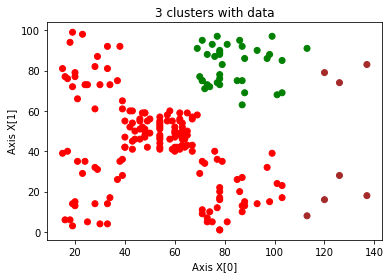

In [207]:
# Generate scatter plot for clustered data
colors = list(map(lambda x: 'red' if x == 0 
                  else ('green' if x == 1 
                        else ( 'blue' if x==2 
                              else ('cyan' if x==3 
                                    else ('black' if x==4 
                                          else( 'coral' if x==5 
                                              else ( 'yellow' if x==6 
                                                   else 'brown')) ))))
                  , labels))

plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('3 clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [208]:
epsilon = 20.2
min_samples = 16
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print('_____________________________________________')

Estimated no. of clusters: 2
Estimated no. of noise points: 6
_____________________________________________


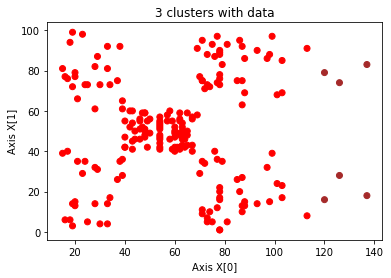

In [209]:
#Generate scatter plot for clustered data
colors = list(map(lambda x: 'red' if x == 0 
                  else ('green' if x == 1 
                        else ( 'blue' if x==2 
                              else ('cyan' if x==3 
                                    else ('black' if x==4 
                                          else( 'coral' if x==5 
                                              else ( 'yellow' if x==6 
                                                   else 'brown')) ))))
                  , labels))

plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('3 clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

### Conclusion
I have tried multiple epsilon values and min sample size but the scan is unable to reduce the noise to zero and the best the model can is 7 noise points. However, if sample size is chosen as 1 the noise becomes zero but data visualization is not satisfactory.